In [76]:
# Imports
import random
import numpy as np
import sympy as sp
from tqdm import tqdm
import matplotlib.pyplot as plt

# Function to simulate the number path chain
def number_path(N=25, p=0.5, X_0=1, coin_nums=[1,2], verbose=False):
    # If we start at X_0 > N we cannot reach N
    if X_0 > N:
        return False
    # If X_0 = N then we already have achieved N
    if X_0 == N:
        return True
    
    # Track iteration number
    iter_num = 0
    # Initialise the chain at X_0
    X = X_0
    # If verbose, print the first value
    if verbose:
        print(f"X_0 = {X_0}")
    # Iterate until we either get X >= N or have too many iterations 
    while X < N and iter_num < N:
        # Choose number randomly from numbers on the coin, weighted by the respective probabilities
        # Add the choice to the previous number
        X += random.choices(coin_nums, [p, 1-p])[0]
        # Add one to the iteration number
        iter_num += 1
        
        # If verbose, print the new number
        if verbose:
            print(f"X_{iter_num} = {X}")
        
        # If X == N, we have achieved N
        if X == N:
            return True
            if verbose:
                print("N achieved")
        # If X > N, we cannot achieve N
        elif X > N:
            return False
            if verbose:
                print("N not achieved")
        
    return False
        
# Test
number_path(10, verbose = True)

X_0 = 1
X_1 = 2
X_2 = 3
X_3 = 5
X_4 = 7
X_5 = 8
X_6 = 10


True

In [35]:
# Function to simulate the number path chain to estimate the hitting probabilities
def estimate_probabilities(N=25, p=0.5, X_0=1, coin_nums=[1,2], num_sims=10000):
    # List to store simulation results
    sim_results = []
    
    for _ in range(num_sims):
        # Append the simulation results to the list
        sim_results.append(number_path(N=N, p=p, X_0=X_0, coin_nums=coin_nums))
    
    # Calculate and return empirical hitting probability
    return sum(sim_results) / len(sim_results)
    
# Test
print(f"h_12 = {estimate_probabilities(N=2)}")
print(f"h_13 = {estimate_probabilities(N=3)}")

h_12 = 0.5038
h_13 = 0.7467


## Conjecture 1

In [37]:
# Function to get the value of the recurrence relation recursively up to N
def recurrence_values(N):
    # Starting values
    values = [1,0.5]
    while len(values) < N:
        # Append recursion values to the list
        values.append(0.5 * values[-1] + 0.5 * values[-2])
        
    return values

# Test
print(recurrence_values(5))

[1, 0.5, 0.75, 0.625, 0.6875]


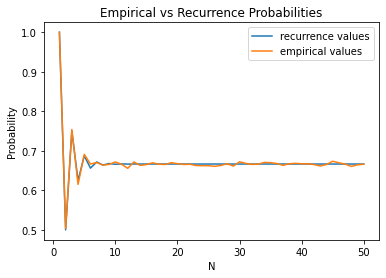

In [48]:
# Code to compare the empirical values to those obtained by the recurrence relation
N_max = 50

# Get recurrence values
recurrence_vals = recurrence_values(N_max)
# Get simulation results
sim_results = [estimate_probabilities(N+1) for N in range(N_max)]

# Plot the recurrence and simulation results
plt.plot(list(range(1,N_max+1)), recurrence_vals, label='recurrence values')
plt.plot(list(range(1,N_max+1)), sim_results, label='empirical values')
plt.title('Empirical vs Recurrence Probabilities')
plt.xlabel('N')
plt.ylabel('Probability')
plt.legend()
plt.show()

## Conjecture 2

In [51]:
# Code to solve the recurrence relation symbolically
# Define the symbols
j = sp.Symbol('j', integer=True)
h = sp.Function('h')

# Define the recurrence relation
recurrence = sp.Eq(h(j), (1/2) * h(j-1) + (1/2) * h(j-2))

# Initial conditions
init_conditions = {h(1): 1, h(2): 1/2}

# Solve the recurrence relation
solution = sp.rsolve(recurrence, h(j), init_conditions)
solution = sp.nsimplify(solution, rational=True)

solution

2/3 - 2*(-1/2)**j/3

In [54]:
# Function to get the value of the probability according to the formula
def formula_value(N):
    return 2/3 - 2/3 * (-1/2)**N

# Test
print(formula_value(1))
print(formula_value(2))
print(formula_value(3))

1.0
0.5
0.75


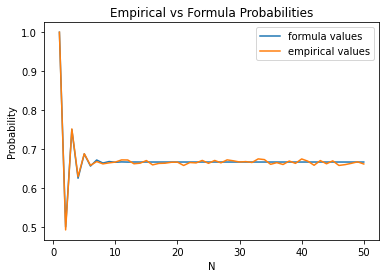

In [58]:
# Code to compare the empirical values to those obtained by the recurrence relation
N_max = 50

# Get formula values
formula_values = [formula_value(N+1) for N in range(N_max)]
# Get simulation results
sim_results = [estimate_probabilities(N+1) for N in range(N_max)]

# Plot the formula and simulation values
plt.plot(list(range(1,N_max+1)), formula_values, label='formula values')
plt.plot(list(range(1,N_max+1)), sim_results, label='empirical values')
plt.title('Empirical vs Formula Probabilities')
plt.xlabel('N')
plt.ylabel('Probability')
plt.legend()
plt.show()

## Conjecture 3

In [57]:
# Large simulation for N=25
print(f"h_1,25 = {estimate_probabilities(N=25, num_sims=1000000)}")

h_1,25 = 0.666078


## Final Check

In [93]:
# Check results for N=5
print(f"h^_1,5 = {estimate_probabilities(N=5)}")
print(f"Using the recurrence relation, h_1,5 = {recurrence_values(5)[-1]}")
print(f"Using the formula, h_1,5 = {formula_value(5)}")

h^_1,5 = 0.6897
Using the recurrence relation, h_1,5 = 0.6875
Using the formula, h_1,5 = 0.6875


## Extensions

### Changing Flip Probabilities

In [94]:
# Solving the recurrence relation symbolically
# Define symbols
p = sp.Symbol('p')
j = sp.Symbol('j', integer=True)
h_p = sp.Function('h_p')

# Define the recurrence relations
adjusted_recurrence = sp.Eq(h_p(j), p * h_p(j-1) + (1 - p) * h_p(j-2))

# Initial conditions
adjusted_init_conditions = {h_p(1): 1, h_p(2): p}

# Solve the recurrence relation
adjusted_solution = sp.rsolve(adjusted_recurrence, h_p(j), adjusted_init_conditions)

# Simplify
adjusted_solution_fractional = sp.nsimplify(adjusted_solution, rational=True)

adjusted_solution_fractional

(p - 1)**j/(p - 2) - 1/(p - 2)

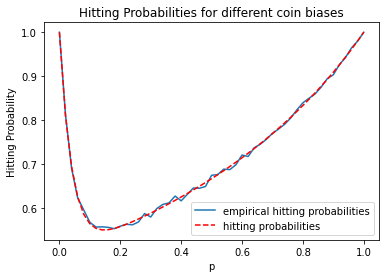

In [98]:
# Function to get the value of the probability according to the formula, for general p
def formula_value_p(N, p):
    return -1 / (p-2) + (1 / (p-2)) * (p-1)**N

# Get probability values in the interval [0,1] in increments of 0.02
probabilities = np.linspace(0,1,51)
# Get emprirical hitting probabilities
emp_hitting_probabilities_p = [estimate_probabilities(N=25, p=p) for p in probabilities]
# Get hitting probabilities from the formula
hitting_probabilities_p = [formula_value_p(N=25, p=p) for p in probabilities]

# Plot formula and simulation hitting probabilities
plt.plot(probabilities, emp_hitting_probabilities_p, label='empirical hitting probabilities')
plt.plot(probabilities, hitting_probabilities_p, label='hitting probabilities', linestyle='--', color='red')
plt.title('Hitting Probabilities for different coin biases')
plt.xlabel('p')
plt.ylabel('Hitting Probability')
plt.legend()
plt.show()

### Changing Starting Point

100%|██████████| 30/30 [00:04<00:00,  6.77it/s]


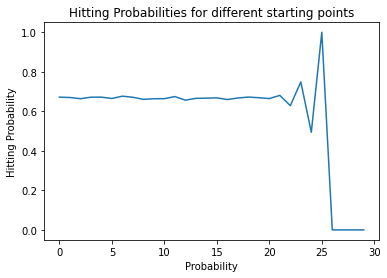

In [82]:
# Get list of starting values from 0 to 30
starting_values = list(range(30))
# Calculate empirical hitting probabilities
hitting_probabilities_X = [estimate_probabilities(N=25, X_0=X_0) for X_0 in tqdm(starting_values)]

# Plot hitting probabilities
plt.plot(starting_values, hitting_probabilities_X)
plt.title('Hitting Probabilities for different starting points')
plt.xlabel('Probability')
plt.ylabel('Hitting Probability')
plt.show()

### Changing Numbers on the coin

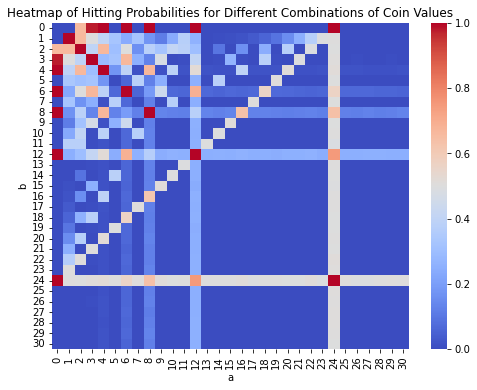

In [91]:
import seaborn as sns

# Define largest coin value
largest_value = 30

# Define the grid for a and b
a_values = np.linspace(0, largest_value, largest_value+1)
b_values = np.linspace(0, largest_value, largest_value+1)

# Create meshgrid
A, B = np.meshgrid(a_values, b_values)

# Compute empirical hitting probabilities over the grid
Z = np.array([[estimate_probabilities(N=25, coin_nums=[int(a), int(b)]) for a in a_values] for b in b_values])

# Create heatmap of hitting probabilities
plt.figure(figsize=(8, 6))
sns.heatmap(Z, cmap="coolwarm")
plt.xlabel("a")
plt.ylabel("b")
plt.title("Heatmap of Hitting Probabilities for Different Combinations of Coin Values")

plt.show()


### Look at what happens as N tends to infinity

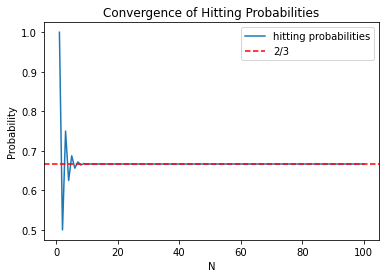

In [65]:
# Code to compare the empirical values to those obtained by the recurrence relation
N_max = 100

# Get formula values
formula_values = [formula_value(N+1) for N in range(N_max)]

# Plot hitting probabilities
plt.plot(list(range(1,N_max+1)), formula_values, label='hitting probabilities')
# Horizontal line at 2/3
plt.axhline(2/3, color = 'red', linestyle='--', label='2/3')
plt.title('Convergence of Hitting Probabilities')
plt.xlabel('N')
plt.ylabel('Probability')
plt.legend()
plt.show()